# 任务三——建模调参

In [84]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [85]:
# 祖传代码......调整数据类型以减少内存
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [86]:
path = 'C:/python_temp'
sample_feature = reduce_mem_usage(pd.read_csv(path + '/data/data_for_tree.csv'))

Memory usage of dataframe is 117830032.00 MB
Memory usage after optimization is: 35229781.00 MB
Decreased by 70.1%


In [87]:
sample_feature.columns

Index(['SaleID', 'name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
       'power', 'kilometer', 'notRepairedDamage', 'seller', 'offerType',
       'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8',
       'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'train', 'used_time',
       'city', 'brand_amount', 'brand_price_max', 'brand_price_median',
       'brand_price_min', 'brand_price_sum', 'brand_price_std',
       'brand_price_average', 'model_amount', 'model_price_max',
       'model_price_median', 'model_price_min', 'model_price_sum',
       'model_price_std', 'model_price_average', 'bodyType_amount',
       'bodyType_price_max', 'bodyType_price_median', 'bodyType_price_min',
       'bodyType_price_sum', 'bodyType_price_std', 'bodyType_price_average',
       'fuelType_amount', 'fuelType_price_max', 'fuelType_price_median',
       'fuelType_price_min', 'fuelType_price_sum', 'fuelType_price_std',
       'fuelType_price_average', 'gearbox_amount', 'gearbox

In [88]:
sample_feature = sample_feature[sample_feature['train']==1]

In [89]:
data_sample = sample_feature.drop(['SaleID','name','seller','offerType'],axis=1)

In [100]:
cat_features = ['brand','model','brand','bodyType','fuelType','gearbox','notRepairedDamage','city']
continuous_feature_names = [x for x in data_sample.columns if x not in cat_features]

In [101]:
# 只用连续变量建模
data_sample = data_sample[continuous_feature_names]

In [102]:
data_sample = data_sample.dropna().replace('-', 0).reset_index(drop=True)

In [103]:
data_sample.shape

(91721, 63)

In [104]:
train_y = data_sample['price']

In [105]:
train_X = data_sample.drop(['price','train'],axis=1)

# 线性回归+五折交叉验证

In [109]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model = model.fit(train_X, train_y)

In [110]:
'intercept:'+ str(model.intercept_)

sorted(dict(zip(continuous_feature_names, model.coef_)).items(), key=lambda x:x[1], reverse=True)

[('gearbox_price_max', 13333594138735.982),
 ('fuelType_price_max', 9396655134468.184),
 ('fuelType_price_min', 1634972800587.096),
 ('fuelType_amount', 1069904631147.1187),
 ('fuelType_price_median', 35218542.877972074),
 ('v_5', 3098066.9190709805),
 ('v_7', 644848.37291238),
 ('v_4', 48647.79998773839),
 ('v_2', 38808.596698353904),
 ('v_12', 37276.03931167512),
 ('v_11', 25817.221099000453),
 ('v_6', 17082.385292844974),
 ('bodyType_price_sum', 36.14265015115265),
 ('power', 18.516213562959102),
 ('model_price_std', 0.8791966313450976),
 ('model_price_sum', 0.5253363013769804),
 ('model_price_min', 0.3600436994627082),
 ('gearbox_price_std', 0.27292808971142),
 ('power_price_min', 0.22272396721202292),
 ('power_amount', 0.21528395354887625),
 ('brand_price_std', 0.20230853139050936),
 ('brand_amount', 0.1996981832368358),
 ('brand_price_min', 0.19938152171999943),
 ('model_price_max', 0.14506951292136702),
 ('power_price_max', 0.115740966931535),
 ('power_price_sum', 0.051692228010

In [111]:
from matplotlib import pyplot as plt
subsample_index = np.random.randint(low=0, high=len(train_y), size=50)

The predicted price is obvious different from true price


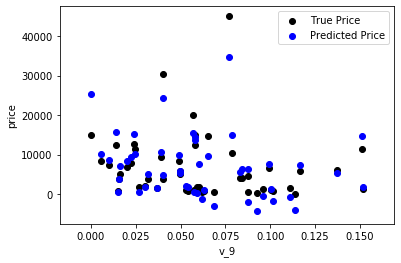

In [112]:
plt.scatter(train_X['v_9'][subsample_index], train_y[subsample_index], color='black')
plt.scatter(train_X['v_9'][subsample_index], model.predict(train_X.loc[subsample_index]), color='blue')
plt.xlabel('v_9')
plt.ylabel('price')
plt.legend(['True Price','Predicted Price'],loc='upper right')
print('The predicted price is obvious different from true price')
plt.show()

It is clear to see the price shows a typical exponential distribution


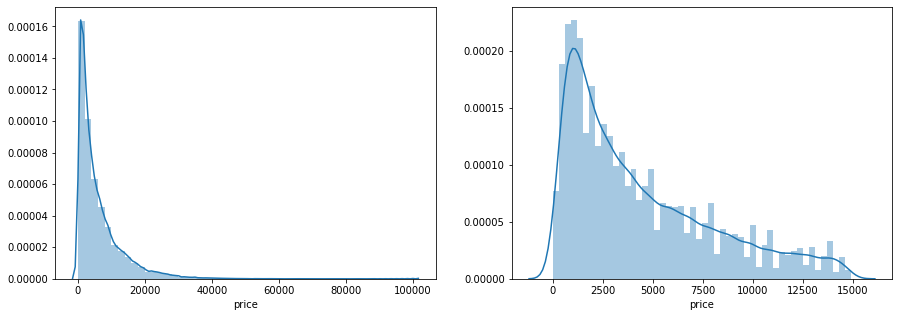

In [113]:
import seaborn as sns
print('It is clear to see the price shows a typical exponential distribution')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_y)
plt.subplot(1,2,2)
sns.distplot(train_y[train_y < np.quantile(train_y, 0.9)])

The transformed price seems like normal distribution


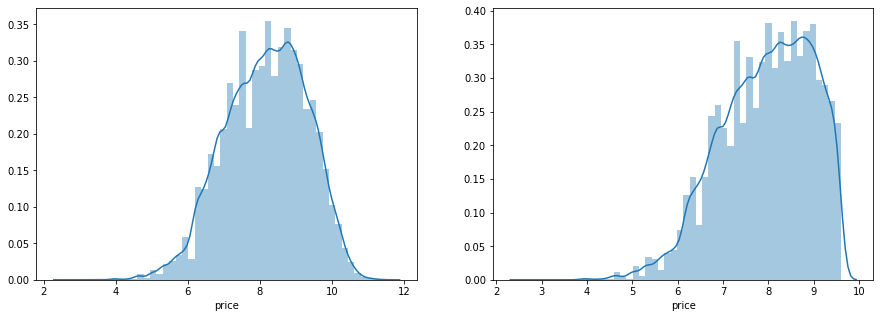

In [114]:
train_y_ln = np.log(train_y + 1) # +1是为了避免为0？
import seaborn as sns
print('The transformed price seems like normal distribution')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_y_ln)
plt.subplot(1,2,2)
sns.distplot(train_y_ln[train_y_ln < np.quantile(train_y_ln, 0.9)])

In [115]:
model = model.fit(train_X, train_y_ln)

print('intercept:'+ str(model.intercept_))
sorted(dict(zip(continuous_feature_names, model.coef_)).items(), key=lambda x:x[1], reverse=True)

intercept:11312510963901.75


[('fuelType_price_max', 260044655.53896224),
 ('fuelType_price_min', 45246519.39005686),
 ('fuelType_amount', 29608725.369074102),
 ('fuelType_price_median', 974.6440323938841),
 ('v_4', 12.236104240728277),
 ('v_11', 9.029990877229203),
 ('v_8', 5.390382112936088),
 ('v_2', 5.318210197603786),
 ('v_10', 3.83729309474915),
 ('v_12', 2.7222263343365105),
 ('v_0', 2.0464684738735985),
 ('v_6', 1.2585881709960998),
 ('power_price_std', 0.008172639234697528),
 ('bodyType_price_sum', 0.002246695897905348),
 ('power', 0.000645063082212942),
 ('model_price_std', 5.497992724449322e-05),
 ('model_price_min', 1.7157588750261626e-05),
 ('brand_amount', 1.5439469854575435e-05),
 ('brand_price_std', 6.303856458661475e-06),
 ('brand_price_min', 4.736374185738071e-06),
 ('model_price_max', 2.776057187400489e-06),
 ('power_amount', 2.7710916073304904e-06),
 ('model_amount', 2.1861722281826855e-06),
 ('train', 2.11523521969619e-06),
 ('used_time', 4.988607602589134e-07),
 ('brand_price_average', 1.5039

The predicted price seems normal after np.log transforming


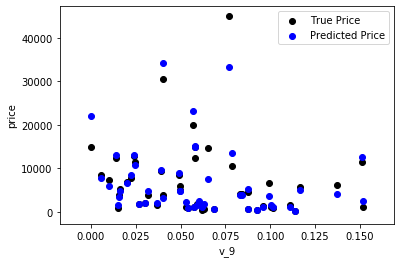

In [116]:
plt.scatter(train_X['v_9'][subsample_index], train_y[subsample_index], color='black')
plt.scatter(train_X['v_9'][subsample_index], np.exp(model.predict(train_X.loc[subsample_index])), color='blue')
plt.xlabel('v_9')
plt.ylabel('price')
plt.legend(['True Price','Predicted Price'],loc='upper right')
print('The predicted price seems normal after np.log transforming')
plt.show()

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,  make_scorer

In [118]:
# 函数装饰器，参数是一个函数，返回一个函数
# 因为我们第二次对price取了log,所以比较效果的时候要保持相同的量纲，第一次的MAE也要取log，这个函数就是更改MAE的传入参数，使两次MAE评价函数的量纲相同
def log_transfer(func):
    def wrapper(y, yhat):
        result = func(np.log(y), np.nan_to_num(np.log(yhat)))
        return result
    return wrapper

In [119]:
# 由于我们更改了MAE函数，需要定义make_scorer
scores = cross_val_score(model, X=train_X, y=train_y, verbose=1, cv = 5, scoring=make_scorer(log_transfer(mean_absolute_error)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished


In [120]:
print('AVG:', np.mean(scores))

AVG: inf


In [121]:
scores = cross_val_score(model, X=train_X, y=train_y_ln, verbose=1, cv = 5, scoring=make_scorer(mean_absolute_error))
print('AVG:', np.mean(scores))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AVG: 0.19182198021342664


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished


In [122]:
scores = pd.DataFrame(scores.reshape(1,-1))
scores.columns = ['cv' + str(x) for x in range(1, 6)]
scores.index = ['MAE']
scores

,cv1,cv2,cv3,cv4,cv5
MAE,0.189947,0.192014,0.192352,0.190613,0.194184


##  模拟真实业务情况

按时间顺序分割数据集

In [123]:
import datetime
data_sample = data_sample.reset_index(drop=True)
data_sample = data_sample[data_sample['train']==1]
split_point = len(data_sample) // 5 * 4

In [124]:
train = data_sample.loc[:split_point].dropna()
val = data_sample.loc[split_point:].dropna()

train_X = train[continuous_feature_names]
train_y_ln = np.log(train['price'] + 1)
val_X = val[continuous_feature_names]
val_y_ln = np.log(val['price'] + 1)

In [125]:
model = model.fit(train_X, train_y_ln)
mean_absolute_error(val_y_ln, model.predict(val_X))

0.18903197192298718

# 绘制学习率曲线

In [126]:
from sklearn.model_selection import learning_curve, validation_curve

In [127]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=1, train_size=np.linspace(.1, 1.0, 5 )):  
    plt.figure()  
    plt.title(title)  
    if ylim is not None:  
        plt.ylim(*ylim)  
    plt.xlabel('Training example')  
    plt.ylabel('score')  
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_size, scoring = make_scorer(mean_absolute_error))  
    train_scores_mean = np.mean(train_scores, axis=1)  
    train_scores_std = np.std(train_scores, axis=1)  
    test_scores_mean = np.mean(test_scores, axis=1)  
    test_scores_std = np.std(test_scores, axis=1)  
    plt.grid()#区域  
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,  
                     train_scores_mean + train_scores_std, alpha=0.1,  
                     color="r")  
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,  
                     test_scores_mean + test_scores_std, alpha=0.1,  
                     color="g")  
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',  
             label="Training score")  
    plt.plot(train_sizes, test_scores_mean,'o-',color="g",  
             label="Cross-validation score")  
    plt.legend(loc="best")  
    return plt  

<module 'matplotlib.pyplot' from 'C:\\Users\\WANGQ\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

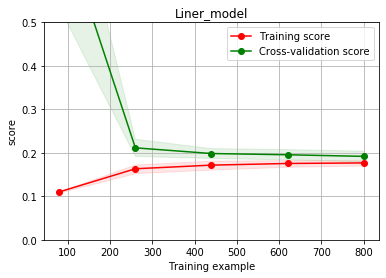

In [128]:
plot_learning_curve(LinearRegression(), 'Liner_model', train_X[:1000], train_y_ln[:1000], ylim=(0.0, 0.5), cv=5, n_jobs=1)  

# 多种模型对比

In [129]:
train = data_sample[continuous_feature_names].dropna()

train_X = train[continuous_feature_names].drop(['price'],axis=1)
train_y = train['price']
train_y_ln = np.log(train_y + 1)

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [131]:
models = [LinearRegression(),
          Ridge(),
          Lasso()]

In [132]:
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error))
    result[model_name] = scores
    print(model_name + ' is finished')

LinearRegression is finished
Ridge is finished
Lasso is finished


In [133]:
result = pd.DataFrame(result)
result.index = ['cv' + str(x) for x in range(1, 6)]
result

,LinearRegression,Ridge,Lasso
cv1,0.189835,0.192179,0.365006
cv2,0.191873,0.194292,0.365715
cv3,0.192449,0.195073,0.368139
cv4,0.190599,0.192639,0.363824
cv5,0.194059,0.196674,0.365952


In [134]:
model = LinearRegression()
model = model.fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))


intercept:21.737883663536845


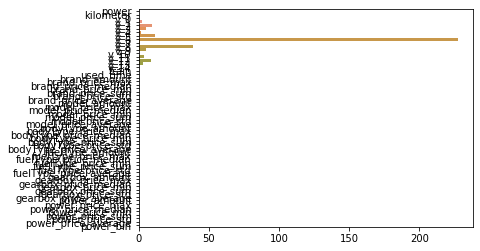

In [144]:
sns.barplot(abs(model.coef_), continuous_feature_names)

intercept:0.8594679736989956


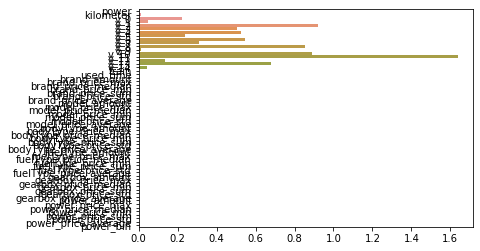

In [145]:
model = Ridge().fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
sns.barplot(abs(model.coef_), continuous_feature_names)

intercept:8.567591031098907


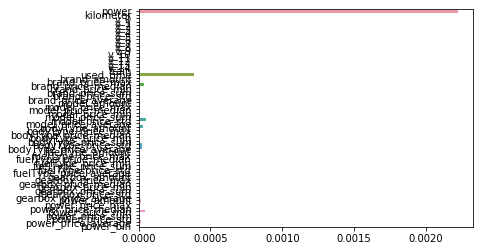

In [146]:
model = Lasso().fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
sns.barplot(abs(model.coef_), continuous_feature_names)

# 用非线性模型

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

In [151]:
models = [LinearRegression(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
          MLPRegressor(solver='lbfgs', max_iter=100), 
          XGBRegressor(n_estimators = 100, objective='reg:squarederror'), 
          LGBMRegressor(n_estimators = 100)]

In [152]:
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error))
    result[model_name] = scores
    print(model_name + ' is finished')

LinearRegression is finished
DecisionTreeRegressor is finished
RandomForestRegressor is finished
GradientBoostingRegressor is finished
MLPRegressor is finished
XGBRegressor is finished
LGBMRegressor is finished


In [153]:
result = pd.DataFrame(result)
result.index = ['cv' + str(x) for x in range(1, 6)]
result

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor,LGBMRegressor
cv1,0.189835,0.195869,0.145025,0.173232,171698.329648,0.142149,0.145726
cv2,0.191873,0.198623,0.147013,0.174090,242339.170057,0.143774,0.147459
cv3,0.192449,0.197825,0.145891,0.173123,194398.485260,0.143703,0.146600
cv4,0.190599,0.192664,0.144535,0.172142,182063.499826,0.141521,0.145073
cv5,0.194059,0.199387,0.147061,0.177700,166270.487822,0.145482,0.149545


# 调参

In [154]:
## LGB的参数集合：

objective = ['regression', 'regression_l1', 'mape', 'huber', 'fair']

num_leaves = [3,5,10,15,20,40, 55]
max_depth = [3,5,10,15,20,40, 55]
bagging_fraction = []
feature_fraction = []
drop_rate = []

# 贪心算法

In [155]:
best_obj = dict()
for obj in objective:
    model = LGBMRegressor(objective=obj)
    score = np.mean(cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error)))
    best_obj[obj] = score
    
best_leaves = dict()
for leaves in num_leaves:
    model = LGBMRegressor(objective=min(best_obj.items(), key=lambda x:x[1])[0], num_leaves=leaves)
    score = np.mean(cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error)))
    best_leaves[leaves] = score
    
best_depth = dict()
for depth in max_depth:
    model = LGBMRegressor(objective=min(best_obj.items(), key=lambda x:x[1])[0],
                          num_leaves=min(best_leaves.items(), key=lambda x:x[1])[0],
                          max_depth=depth)
    score = np.mean(cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error)))
    best_depth[depth] = score

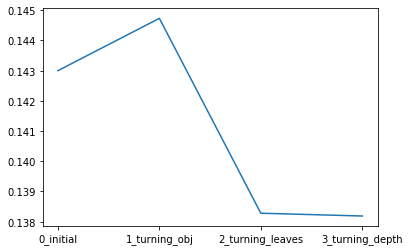

In [156]:
sns.lineplot(x=['0_initial','1_turning_obj','2_turning_leaves','3_turning_depth'], y=[0.143 ,min(best_obj.values()), min(best_leaves.values()), min(best_depth.values())])

# 网格搜索法

In [157]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'objective': objective , 'num_leaves': num_leaves, 'max_depth': max_depth}
model = LGBMRegressor()
clf = GridSearchCV(model, parameters, cv=5)
clf = clf.fit(train_X, train_y)

In [ ]:
clf.best_params_

In [ ]:
model = LGBMRegressor(objective='regression',
                          num_leaves=55,
                          max_depth=15)

In [ ]:
np.mean(cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error)))

# 贝叶斯调参

In [ ]:
from bayes_opt import BayesianOptimization

In [ ]:
def rf_cv(num_leaves, max_depth, subsample, min_child_samples):
    val = cross_val_score(
        LGBMRegressor(objective = 'regression_l1',
            num_leaves=int(num_leaves),
            max_depth=int(max_depth),
            subsample = subsample,
            min_child_samples = int(min_child_samples)
        ),
        X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error)
    ).mean()
    return 1 - val

In [ ]:
rf_bo = BayesianOptimization(
    rf_cv,
    {
    'num_leaves': (2, 100),
    'max_depth': (2, 100),
    'subsample': (0.1, 1),
    'min_child_samples' : (2, 100)
    }
)

In [ ]:
rf_bo.maximize()

In [ ]:
1 - rf_bo.max['target']

In [ ]:
plt.figure(figsize=(13,5))
sns.lineplot(x=['0_origin','1_log_transfer','2_L1_&_L2','3_change_model','4_parameter_turning'], y=[1.36 ,0.19, 0.19, 0.14, 0.13])